In [92]:
import pandas as pd
import fastai.collab as fc
import fastai.tabular.all as ft

import torch
import torch.nn as nn
import torch.nn.functional as F

In [93]:
!ls storage/anime/

animes.csv  profiles.csv  reviews.csv


In [94]:
animes = pd.read_csv('storage/anime/animes.csv')
animes = animes.drop_duplicates() #animes tiene filas duplicadas
animes

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. \r\n \r\nWhen they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to d...","['Comedy', 'Sports', 'Drama', 'School', 'Shounen']","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/76662.jpg,https://myanimelist.net/anime/28891/Haikyuu_Second_Season
1,23273,Shigatsu wa Kimi no Uso,"Music accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. \r\n \r\nTwo years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. \r\n \r\nBased on the manga serie...","['Drama', 'Music', 'Romance', 'School', 'Shounen']","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/67177.jpg,https://myanimelist.net/anime/23273/Shigatsu_wa_Kimi_no_Uso
2,34599,Made in Abyss,"The Abyss—a gaping chasm stretching down into the depths of the earth, filled with mysterious creatures and relics from a time long past. How did it come to be? What lies at the bottom? Countless brave individuals, known as Divers, have sought to solve these mysteries of the Abyss, fearlessly descending into its darkest realms. The best and bravest of the Divers, the White Whistles, are hailed as legends by those who remain on the surface. \r\n \r\nRiko, daughter of the missing White Whistle Lyza the Annihilator, aspires to become like her mother and explore the furthest reaches of the Aby...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/86733.jpg,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, something of equal value must be lost."" \r\n \r\nAlchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their orig...","['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen']","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/96541.jpg,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood
4,31758,Kizumonogatari III: Reiketsu-hen,"After helping revive the legendary vampire Kiss-shot Acerola-orion Heart-under-blade, Koyomi Araragi has become a vampire himself and her servant. Kiss-shot is certain she can turn him back into a human, but only once regaining her full power. \r\n \r\nAraragi has hunted down the three vampire hunters that defeated Kiss-shot and retrieved her limbs to return her to full strength. However, now that Araragi has alm

In [95]:
# animes[animes['uid']==29111]

In [96]:
profiles = pd.read_csv('storage/anime/profiles.csv')
profiles = profiles.drop_duplicates() #profiles tiene filas duplicadas

profiles

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '9253', '34599', '3588', '13601', '6956']",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382', '849', '235', '35180', '31646']",https://myanimelist.net/profile/aManOfCulture99
...,...,...,...,...,...
77656,daniel1302,NaN,NaN,[],https://myanimelist.net/profile/daniel1302
77657,bridgesams,Male,"Jan 1, 2001","['37510', '35180', '30', '31043', '5081', '37450', '11843']",https://myanimelist.net/profile/bridgesams
77659,Officer_Anime,NaN,NaN,[],https://myanimelist.net/profile/Officer_Anime
77660,Yuez,NaN,NaN,[],https://myanimelist.net/profile/Yuez


In [127]:
ratings = pd.read_csv('storage/anime/reviews.csv')
ratings.drop(['text','scores','link'],axis=1,inplace=True)
ratings=ratings.drop_duplicates()
ratings

,uid,profile,anime_uid,score
0,255938,DesolatePsyche,34096,8
1,259117,baekbeans,34599,10
2,253664,skrn,28891,7
3,8254,edgewalker00,2904,9
4,291149,aManOfCulture99,4181,10
...,...,...,...,...
182629,146535,iHitokage,2593,10
182631,13126,Onegai,2593,7
182633,127899,Murasa22,2593,10
182636,286852,srry4apologizng,2593,9


# Join

In [151]:
joined=ratings.join(profiles[['birthday','gender','profile']].set_index('profile'),on='profile')

joined

,uid,profile,anime_uid,score,birthday,gender
0,255938,DesolatePsyche,34096,8,"Oct 2, 1994",Male
1,259117,baekbeans,34599,10,"Nov 10, 2000",Female
2,253664,skrn,28891,7,NaN,NaN
3,8254,edgewalker00,2904,9,Sep 5,Male
4,291149,aManOfCulture99,4181,10,"Oct 30, 1999",Male
...,...,...,...,...,...,...
182629,146535,iHitokage,2593,10,NaN,Male
182631,13126,Onegai,2593,7,NaN,Male
182633,127899,Murasa22,2593,10,"Feb 16, 1993",Male
182636,286852,srry4apologizng,2593,9,NaN,NaN


In [152]:
joined.rename(columns={'score':'score_user'},inplace=True) #cambio de nombre la columna para no generar conflictos
joined.columns

Index(['uid', 'profile', 'anime_uid', 'score_user', 'birthday', 'gender'], dtype='object')

In [153]:
joined = joined.join(animes[['genre','episodes','score','popularity','ranked','uid']].set_index('uid'),on='anime_uid')
joined=joined.drop_duplicates()
joined.reset_index(inplace=True)
joined

,index,uid,profile,anime_uid,score_user,birthday,gender,genre,episodes,score,popularity,ranked
0,0,255938,DesolatePsyche,34096,8,"Oct 2, 1994",Male,"['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen']",12.0,8.94,800,15.0
1,1,259117,baekbeans,34599,10,"Nov 10, 2000",Female,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']",13.0,8.83,98,23.0
2,2,253664,skrn,28891,7,NaN,NaN,"['Comedy', 'Sports', 'Drama', 'School', 'Shounen']",25.0,8.82,141,25.0
3,3,8254,edgewalker00,2904,9,Sep 5,Male,"['Action', 'Military', 'Sci-Fi', 'Super Power', 'Drama', 'Mecha']",25.0,8.93,27,17.0
4,4,291149,aManOfCulture99,4181,10,"Oct 30, 1999",Male,"['Slice of Life', 'Comedy', 'Supernatural', 'Drama', 'Romance']",24.0,8.97,64,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131206,182629,146535,iHitokage,2593,10,NaN,Male,"['Action', 'Mystery', 'Supernatural', 'Thriller']",1.0,7.70,358,1160.0
131207,182631,13126,Onegai,2593,7,NaN,Male,"['Action', 'Mystery', 'Supernatural', 'Thriller']",1.0,7.70,358,1160.0
131208,182633,127899,Murasa22,2593,10,"Feb 16, 1993",Male,"['Action', 'Mystery', 'Supernatural', 'Thriller']",1.0,7.70,358,1160.0
131209,182636,286852,srry4apologizng,2593,9,NaN,NaN,"['Action', 'Mystery', 'Supernatural', 'Thriller']",1.0,7.70,358,1160.0


# Corrida sin separar el genero

In [17]:
dls = fc.CollabDataLoaders.from_df(joined, user_name = 'uid', item_name = 'anime_uid', rating_name = 'score',bs=128)

In [18]:
# fc.CollabDataLoaders??

In [19]:
def flat_l1(yp, y): 
    return F.l1_loss(yp.view(-1), y.view(-1))


In [20]:
learn = fc.collab_learner(dls, opt_func = fc.ranger, use_nn=True, emb_szs={'uid':4,'anime_uid':4}, metrics=flat_l1)

In [21]:
print(learn.model)
learn.summary()

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(114231, 4)
    (1): Embedding(7708, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=8, out_features=50, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=50, out_features=1, bias=True)
    )
  )
)


EmbeddingNN (Input shape: ['128 x 2'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            128 x 4              456,924    True      
________________________________________________________________
Embedding            128 x 4              30,832     True      
________________________________________________________________
Dropout              128 x 8              0          False     
________________________________________________________________
BatchNorm1d          128 x 8              16         True      
________________________________________________________________
Linear               128 x 50             400        True      
________________________________________________________________
ReLU                 128 x 50             0          False     
________________________________________________________________
Linear               128 x 1              51         True      
___________________________________________________________

SuggestedLRs(lr_min=0.2290867567062378, lr_steep=0.0831763744354248)

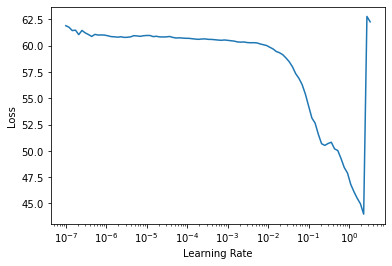

In [22]:
learn.lr_find()

In [23]:
learn.fit_one_cycle(20, 3e-2, div=1, pct_start=0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,0.077459,0.048909,0.134697,00:13
1,0.036912,0.031654,0.109125,00:13
2,0.029949,0.036156,0.136298,00:13
3,0.023992,0.035757,0.138725,00:13
4,0.024391,0.019718,0.071719,00:13
5,0.024268,0.019480,0.066470,00:13
6,0.024697,0.027669,0.117232,00:13
7,0.023619,0.029701,0.121413,00:13
8,0.022658,0.018225,0.066245,00:13
9,0.024955,0.024357,0.096085,00:13


In [24]:
learn = fc.collab_learner(dls, opt_func = fc.ranger, use_nn = True, emb_szs = {'uid': 8, 'anime_uid': 8}, layers = [1024, 512], metrics=flat_l1)

In [25]:
print(learn.model)
learn.summary()

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(114231, 8)
    (1): Embedding(7708, 8)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=16, out_features=1024, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1024, out_features=512, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=512, out_features=1, bias=True)
    )
  )
)


EmbeddingNN (Input shape: ['128 x 2'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            128 x 8              913,848    True      
________________________________________________________________
Embedding            128 x 8              61,664     True      
________________________________________________________________
Dropout              128 x 16             0          False     
________________________________________________________________
BatchNorm1d          128 x 16             32         True      
________________________________________________________________
Linear               128 x 1024           16,384     True      
________________________________________________________________
ReLU                 128 x 512            0          False     
________________________________________________________________
BatchNorm1d          128 x 1024           2,048      True      
___________________________________________________________

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.004365158267319202)

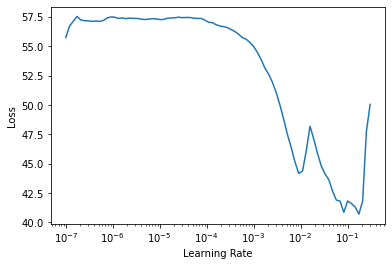

In [26]:
learn.lr_find()

In [27]:
learn.fit_one_cycle(20, 3e-2, div=1, pct_start=0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,0.147198,0.123988,0.277128,00:14
1,0.056150,0.035590,0.111048,00:14
2,0.036289,0.063381,0.214858,00:14
3,0.029579,0.027733,0.115582,00:15
4,0.024536,0.019758,0.064179,00:14
5,0.024609,0.016289,0.060402,00:14
6,0.031453,0.016848,0.066578,00:15
7,0.030894,0.052660,0.202172,00:15
8,0.033522,0.017247,0.060546,00:14
9,0.035197,0.054907,0.195195,00:15


## Corrida separando los generos

In [163]:
generos=joined['genre'].unique()
generos

array(["['Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen']",
       "['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']",
       "['Comedy', 'Sports', 'Drama', 'School', 'Shounen']", ...,
       "['Action', 'Drama', 'Mecha', 'Music', 'Mystery', 'Psychological', 'Romance', 'Sci-Fi']",
       "['Action', 'Military', 'Adventure', 'Mecha']",
       "['Drama', 'Mecha', 'Psychological', 'Sci-Fi']"], dtype=object)

In [82]:
gener_list=[]

for elemento in generos:
    tmp=[g.replace('[','').replace(']','').replace("'","").replace(' ','') for g in elemento.split(',')]
    for g in tmp:
        gener_list.append(g)
        
        
gener_list=list(set(gener_list))

while '' in gener_list:
    gener_list.remove('')
    
gener_list

['Historical',
 'Demons',
 'ShoujoAi',
 'Horror',
 'Thriller',
 'MartialArts',
 'Magic',
 'School',
 'Adventure',
 'Sci-Fi',
 'Shoujo',
 'Parody',
 'Josei',
 'Drama',
 'Romance',
 'Fantasy',
 'Comedy',
 'Shounen',
 'Psychological',
 'Cars',
 'Dementia',
 'Action',
 'Mystery',
 'Harem',
 'Supernatural',
 'Military',
 'Game',
 'Kids',
 'Hentai',
 'SuperPower',
 'ShounenAi',
 'Mecha',
 'SliceofLife',
 'Yuri',
 'Seinen',
 'Yaoi',
 'Police',
 'Space',
 'Vampire',
 'Music',
 'Samurai',
 'Ecchi',
 'Sports']

In [155]:
joined.columns

Index(['index', 'uid', 'profile', 'anime_uid', 'score_user', 'birthday',
       'gender', 'genre', 'episodes', 'score', 'popularity', 'ranked'],
      dtype='object')

In [157]:
copia_p=pd.DataFrame(index=range(len(joined['genre'])))

In [170]:
for elemento in gener_list:
    copia_p[elemento]=False

In [172]:
copia_p['genre'] = joined['genre']

In [178]:

for cont,elemento in enumerate(generos):
    if cont%100 ==0:
        print(cont)
        
    tmp=[g.replace('[','').replace(']','').replace("'","").replace(' ','') for g in elemento.split(',')]
    aux=copia_p['genre']==elemento
    for i in copia_p[aux].index:
        for x in tmp:
            copia_p.loc[i,[x]]=True

        
    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


In [182]:
copia_p.drop('',axis=1,inplace=True)

In [186]:
copia_p['uid']=joined['uid']

In [188]:
joined=joined.join(copia_p.drop(['genre'],axis=1).set_index('uid'),on='uid')


In [190]:
joined.drop(['genre'],axis=1,inplace=True)

In [193]:
joined

,index,uid,profile,anime_uid,score_user,birthday,gender,episodes,score,popularity,...,Yuri,Seinen,Yaoi,Police,Space,Vampire,Music,Samurai,Ecchi,Sports
0,0,255938,DesolatePsyche,34096,8,"Oct 2, 1994",Male,12.0,8.94,800,...,False,False,False,False,False,False,False,True,False,False
1,1,259117,baekbeans,34599,10,"Nov 10, 2000",Female,13.0,8.83,98,...,False,False,False,False,False,False,False,False,False,False
2,2,253664,skrn,28891,7,NaN,NaN,25.0,8.82,141,...,False,False,False,False,False,False,False,False,False,True
3,3,8254,edgewalker00,2904,9,Sep 5,Male,25.0,8.93,27,...,False,False,False,False,False,False,False,False,False,False
4,4,291149,aManOfCulture99,4181,10,"Oct 30, 1999",Male,24.0,8.97,64,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131206,182629,146535,iHitokage,2593,10,NaN,Male,1.0,7.70,358,...,False,False,False,False,False,False,False,False,False,False
131207,182631,13126,Onegai,2593,7,NaN,Male,1.0,7.70,358,...,False,False,False,False,False,False,False,False,False,False
131208,182633,127899,Murasa22,2593,10,"Feb 16, 1993",Male,1.0,7.70,358,...,False,False,False,False,False,False,False,False,False,False
131209,182636,286852,srry4apologizng,2593,9,NaN,NaN,1.0,7.70,358,...,False,False,False,False,False,False,False,False,False,False


In [194]:
dls = fc.CollabDataLoaders.from_df(joined, user_name = 'uid', item_name = 'anime_uid', rating_name = 'score',bs=128)

In [195]:
learn = fc.collab_learner(dls, opt_func = fc.ranger, use_nn = True, emb_szs = {'uid': 8, 'anime_uid': 8}, layers = [1024, 512], metrics=flat_l1)

In [196]:
print(learn.model)
learn.summary()

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(104529, 8)
    (1): Embedding(7619, 8)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=16, out_features=1024, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1024, out_features=512, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=512, out_features=1, bias=True)
    )
  )
)


EmbeddingNN (Input shape: ['128 x 2'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            128 x 8              836,232    True      
________________________________________________________________
Embedding            128 x 8              60,952     True      
________________________________________________________________
Dropout              128 x 16             0          False     
________________________________________________________________
BatchNorm1d          128 x 16             32         True      
________________________________________________________________
Linear               128 x 1024           16,384     True      
________________________________________________________________
ReLU                 128 x 512            0          False     
________________________________________________________________
BatchNorm1d          128 x 1024           2,048      True      
___________________________________________________________

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.004365158267319202)

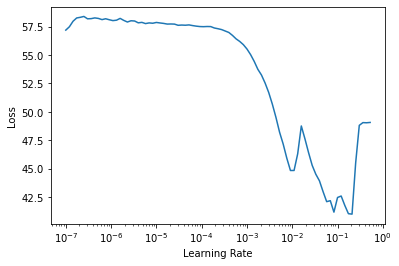

In [197]:
learn.lr_find()

In [198]:
learn.fit_one_cycle(20, 3e-2, div=1, pct_start=0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,0.252718,0.150581,0.283372,00:10
1,0.071800,0.046962,0.139247,00:10
2,0.057617,0.033907,0.111053,00:10
3,0.031481,0.032598,0.117759,00:10
4,0.039154,0.040129,0.155225,00:10
5,0.037229,0.056047,0.198484,00:10
6,0.032268,0.021101,0.064599,00:10
7,0.050466,0.051373,0.184845,00:10
8,0.036705,0.022672,0.078620,00:10
9,0.024898,0.019904,0.056530,00:10
